In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium
import numpy as np

In [2]:
delitos =  "datos/datoscrimen/datoscrimen.shp"
alcaldias = "datos/alcaldias/alcaldias.shp"

In [3]:
delito = gpd.read_file(delitos, SHAPE_RESTORE_SHX='YES')
alcaldia = gpd.read_file(alcaldias, SHAPE_RESTORE_SHX='YES')

In [4]:
#fig, ax = plt.subplots(figsize=(10, 10))
#ax.set_title('delitos', pad = 20, 
#             fontdict={'fontsize':20, 'color': '#4873ab'})
#ax.set_xlabel('Longitud')
#ax.set_ylabel('Latitud')

#map_data.plot(ax=ax, zorder=5)

In [5]:
delito = delito.loc[delito['latitud'] != 'NA']

In [6]:
delito.head()

,ao_hechos,mes_hechos,fecha_hecho,delito,categoria_d,fiscalia,agencia,unidad_inve,alcaldia_he,colonia_hec,ao_inicio,mes_inicio,fecha_inici,calle_hecho,longitud,latitud,geometry
0,2018,Octubre,2018-10-18 10:00:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN CUAUHTEMOC,CUH-5,UI-2SD,CUAUHTEMOC,SANTA MARIA LA RIBERA,2019,Mayo,2019-05-18 06:31:06,NA,-99.15535,19.44736,POINT (-99.15535 19.44736)
1,2018,Octubre,2018-10-15 10:00:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN IZTACALCO,IZC-2,UI-2SD,IZTACALCO,GABRIEL RAMOS MILLÃN SECCIÃN BRAMADERO,2019,Mayo,2019-05-20 12:20:40,NA,-99.09389,19.3952,POINT (-99.09389 19.39520)
2,2018,Octubre,2018-10-09 11:00:00,EXTORSION,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN COYOACÃN,COY-2,UI-3CD,LA MAGDALENA CONTRERAS,CUAUHTÃMOC,2019,Mayo,2019-05-21 22:31:21,NA,-99.2434,19.31909,POINT (-99.24340 19.31909)
3,2018,Octubre,2018-10-16 12:00:00,AMENAZAS,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN CUAUHTEMOC,CUH-8,UI-3SD,CUAUHTEMOC,DOCTORES,2019,Mayo,2019-05-22 06:09:19,NA,-99.14813,19.42385,POINT (-99.14813 19.42385)
4,2018,Octubre,2018-10-20 11:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,FISCALÃA DE INVESTIGACIÃN TERRITORIAL EN IZT...,IZP-4,UI-3SD,IZTAPALAPA,BANJIDAL,2020,Diciembre,2020-12-08 13:24:35,NA,-99.1372067297413,19.3671464195075,POINT (-99.13721 19.36715)


In [7]:
delito.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 22155 entries, 0 to 22958
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ao_hechos    22155 non-null  object  
 1   mes_hechos   22155 non-null  object  
 2   fecha_hecho  22155 non-null  object  
 3   delito       22155 non-null  object  
 4   categoria_d  22155 non-null  object  
 5   fiscalia     22155 non-null  object  
 6   agencia      22155 non-null  object  
 7   unidad_inve  22155 non-null  object  
 8   alcaldia_he  22155 non-null  object  
 9   colonia_hec  22123 non-null  object  
 10  ao_inicio    22155 non-null  object  
 11  mes_inicio   22155 non-null  object  
 12  fecha_inici  22155 non-null  object  
 13  calle_hecho  9669 non-null   object  
 14  longitud     22155 non-null  object  
 15  latitud      22155 non-null  object  
 16  geometry     22155 non-null  geometry
dtypes: geometry(1), object(16)
memory usage: 3.0+ MB


In [8]:
delito['alcaldia_he'].value_counts()

CUAUHTEMOC                3646
IZTAPALAPA                3119
GUSTAVO A MADERO          2183
BENITO JUAREZ             2029
MIGUEL HIDALGO            1569
COYOACAN                  1527
ALVARO OBREGON            1497
VENUSTIANO CARRANZA       1377
TLALPAN                   1168
AZCAPOTZALCO              1082
IZTACALCO                  931
XOCHIMILCO                 683
TLAHUAC                    522
LA MAGDALENA CONTRERAS     343
CUAJIMALPA DE MORELOS      334
MILPA ALTA                 145
Name: alcaldia_he, dtype: int64

In [9]:
dic = {'MILPA ALTA' : '9',
       'BENITO JUAREZ' : '14',
       'GUSTAVO A MADERO' : '5',
        'COYOACAN' : '3',
        'MIGUEL HIDALGO' : '16',
        'LA MAGDALENA CONTRERAS' : '8',
        'TLAHUAC' : '11',
        'AZCAPOTZALCO' : '2',
        'IZTACALCO' : '6',
        'ALVARO OBREGON' : '10',
        'XOCHIMILCO' : '13',
        'VENUSTIANO CARRANZA' : '17',
        'TLALPAN' : '12',
        'CUAJIMALPA DE MORELOS' : '4',
        'CUAUHTEMOC' : '15',
        'IZTAPALAPA' : '7'}

In [10]:
alcaldia.head(20)

,nomgeo,cve_mun,cve_ent,cvegeo,municipio,geometry
0,Milpa Alta,009,09,09009,9,"POLYGON ((-98.99723 19.22731, -98.99745 19.227..."
1,Benito JuÃ¡rez,014,09,09014,14,"POLYGON ((-99.13679 19.40156, -99.13682 19.401..."
2,Gustavo A. Madero,005,09,09005,5,"POLYGON ((-99.11860 19.58446, -99.11691 19.581..."
3,CoyoacÃ¡n,003,09,09003,3,"POLYGON ((-99.13923 19.35687, -99.13772 19.356..."
4,Miguel Hidalgo,016,09,09016,16,"POLYGON ((-99.19058 19.46794, -99.19066 19.465..."
5,La Magdalena Contreras,008,09,09008,8,"POLYGON ((-99.20859 19.33610, -99.20867 19.335..."
6,TlÃ¡huac,011,09,09011,11,"POLYGON ((-98.97893 19.32393, -98.97856 19.323..."
7,Azcapotzalco,002,09,09002,2,"POLYGON ((-99.18231 19.50748, -99.18229 19.507..."
8,Iztacalco,006,09,09006,6,"POLYGON ((-99.05584 19.42196, -99.05589 19.421..."
9,Ãlvaro ObregÃ³n,010,09,09010,10,"POLYGON ((-99.18871 19.39475, -99.18868 19.394..."


In [11]:
delito_count = delito.groupby(['alcaldia_he', 'delito']).agg(['count']).max(axis=1).reset_index(name='count')

In [12]:
delito_count

,alcaldia_he,delito,count
0,ALVARO OBREGON,ABANDONO DE PERSONA,2
1,ALVARO OBREGON,ABORTO,1
2,ALVARO OBREGON,ABUSO DE AUTORIDAD,3
3,ALVARO OBREGON,ABUSO DE CONFIANZA,21
4,ALVARO OBREGON,ABUSO SEXUAL,16
...,...,...,...
1656,XOCHIMILCO,USURPACION DE PROFESION,2
1657,XOCHIMILCO,USURPACIÃN DE IDENTIDAD,3
1658,XOCHIMILCO,VIOLACION,3
1659,XOCHIMILCO,VIOLACION EQUIPARADA,1


In [13]:
delito_count['municipio'] = delito_count['alcaldia_he'].apply(lambda x: dic[x])

In [14]:
delito_count

,alcaldia_he,delito,count,municipio
0,ALVARO OBREGON,ABANDONO DE PERSONA,2,10
1,ALVARO OBREGON,ABORTO,1,10
2,ALVARO OBREGON,ABUSO DE AUTORIDAD,3,10
3,ALVARO OBREGON,ABUSO DE CONFIANZA,21,10
4,ALVARO OBREGON,ABUSO SEXUAL,16,10
...,...,...,...,...
1656,XOCHIMILCO,USURPACION DE PROFESION,2,13
1657,XOCHIMILCO,USURPACIÃN DE IDENTIDAD,3,13
1658,XOCHIMILCO,VIOLACION,3,13
1659,XOCHIMILCO,VIOLACION EQUIPARADA,1,13


In [15]:
delito_count = pd.DataFrame(delito_count)

In [16]:
delito_count.columns

Index(['alcaldia_he', 'delito', 'count', 'municipio'], dtype='object')

In [17]:
delito_count = delito_count.astype({'count': float})

In [18]:
#delito_alcaldia.head(20)

In [19]:
delito_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1661 entries, 0 to 1660
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   alcaldia_he  1661 non-null   object 
 1   delito       1661 non-null   object 
 2   count        1661 non-null   float64
 3   municipio    1661 non-null   object 
dtypes: float64(1), object(3)
memory usage: 52.0+ KB


In [20]:
d = 'ABUSO DE AUTORIDAD'
delito_d = delito_count.loc[delito_count['delito'] == d].copy()
delito_d.head(20)

,alcaldia_he,delito,count,municipio
2,ALVARO OBREGON,ABUSO DE AUTORIDAD,3.0,10
109,AZCAPOTZALCO,ABUSO DE AUTORIDAD,2.0,2
213,BENITO JUAREZ,ABUSO DE AUTORIDAD,6.0,14
334,COYOACAN,ABUSO DE AUTORIDAD,4.0,3
525,CUAUHTEMOC,ABUSO DE AUTORIDAD,37.0,15
672,GUSTAVO A MADERO,ABUSO DE AUTORIDAD,15.0,5
797,IZTACALCO,ABUSO DE AUTORIDAD,8.0,6
893,IZTAPALAPA,ABUSO DE AUTORIDAD,11.0,7
1039,LA MAGDALENA CONTRERAS,ABUSO DE AUTORIDAD,3.0,8
1111,MIGUEL HIDALGO,ABUSO DE AUTORIDAD,5.0,16


In [41]:
d = 'ABUSO DE AUTORIDAD'

In [21]:
delito.loc[(delito['delito'] == 'ABUSO DE AUTORIDAD') & (delito['alcaldia_he'] == 'MILPA ALTA')]

,ao_hechos,mes_hechos,fecha_hecho,delito,categoria_d,fiscalia,agencia,unidad_inve,alcaldia_he,colonia_hec,ao_inicio,mes_inicio,fecha_inici,calle_hecho,longitud,latitud,geometry
7382,2018,Octubre,2018-10-23 16:00,ABUSO DE AUTORIDAD,DELITO DE BAJO IMPACTO,INVESTIGACIÃN DE LOS DELITOS COMETIDOS POR SE...,B,UI-1CD,MILPA ALTA,TULA (SAN PEDRO ATOCPAN),2018,Octubre,2018-10-30 10:46,None,-99.0500364323258,19.2102789023073,POINT (-99.05004 19.21028)


In [22]:
delito_d

,alcaldia_he,delito,count,municipio
2,ALVARO OBREGON,ABUSO DE AUTORIDAD,3.0,10
109,AZCAPOTZALCO,ABUSO DE AUTORIDAD,2.0,2
213,BENITO JUAREZ,ABUSO DE AUTORIDAD,6.0,14
334,COYOACAN,ABUSO DE AUTORIDAD,4.0,3
525,CUAUHTEMOC,ABUSO DE AUTORIDAD,37.0,15
672,GUSTAVO A MADERO,ABUSO DE AUTORIDAD,15.0,5
797,IZTACALCO,ABUSO DE AUTORIDAD,8.0,6
893,IZTAPALAPA,ABUSO DE AUTORIDAD,11.0,7
1039,LA MAGDALENA CONTRERAS,ABUSO DE AUTORIDAD,3.0,8
1111,MIGUEL HIDALGO,ABUSO DE AUTORIDAD,5.0,16


In [23]:
delito = delito.astype({'latitud': float, 'longitud': float})

In [24]:
delito.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 22155 entries, 0 to 22958
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ao_hechos    22155 non-null  object  
 1   mes_hechos   22155 non-null  object  
 2   fecha_hecho  22155 non-null  object  
 3   delito       22155 non-null  object  
 4   categoria_d  22155 non-null  object  
 5   fiscalia     22155 non-null  object  
 6   agencia      22155 non-null  object  
 7   unidad_inve  22155 non-null  object  
 8   alcaldia_he  22155 non-null  object  
 9   colonia_hec  22123 non-null  object  
 10  ao_inicio    22155 non-null  object  
 11  mes_inicio   22155 non-null  object  
 12  fecha_inici  22155 non-null  object  
 13  calle_hecho  9669 non-null   object  
 14  longitud     22155 non-null  float64 
 15  latitud      22155 non-null  float64 
 16  geometry     22155 non-null  geometry
dtypes: float64(2), geometry(1), object(14)
memory usage: 3.7+ MB


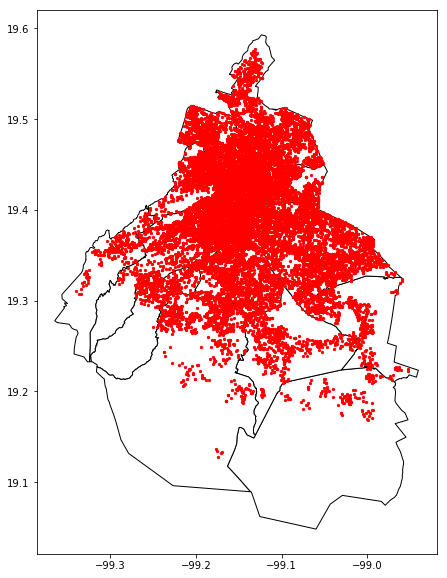

In [25]:
base = alcaldia.plot(color='white', edgecolor='black', figsize=(10,10))
delito.plot(ax=base, marker='o', color='red', markersize=5);

In [26]:
delito_d.columns

Index(['alcaldia_he', 'delito', 'count', 'municipio'], dtype='object')

In [27]:
#alcaldia['a'] = ['1' for i in range(alcaldia.shape[0])]

In [28]:
alcaldia = alcaldia.merge(delito_d, how = 'outer', on='municipio')

In [29]:
alcaldia

,nomgeo,cve_mun,cve_ent,cvegeo,municipio,geometry,alcaldia_he,delito,count
0,Milpa Alta,009,09,09009,9,"POLYGON ((-98.99723 19.22731, -98.99745 19.227...",MILPA ALTA,ABUSO DE AUTORIDAD,1.0
1,Benito JuÃ¡rez,014,09,09014,14,"POLYGON ((-99.13679 19.40156, -99.13682 19.401...",BENITO JUAREZ,ABUSO DE AUTORIDAD,6.0
2,Gustavo A. Madero,005,09,09005,5,"POLYGON ((-99.11860 19.58446, -99.11691 19.581...",GUSTAVO A MADERO,ABUSO DE AUTORIDAD,15.0
3,CoyoacÃ¡n,003,09,09003,3,"POLYGON ((-99.13923 19.35687, -99.13772 19.356...",COYOACAN,ABUSO DE AUTORIDAD,4.0
4,Miguel Hidalgo,016,09,09016,16,"POLYGON ((-99.19058 19.46794, -99.19066 19.465...",MIGUEL HIDALGO,ABUSO DE AUTORIDAD,5.0
5,La Magdalena Contreras,008,09,09008,8,"POLYGON ((-99.20859 19.33610, -99.20867 19.335...",LA MAGDALENA CONTRERAS,ABUSO DE AUTORIDAD,3.0
6,TlÃ¡huac,011,09,09011,11,"POLYGON ((-98.97893 19.32393, -98.97856 19.323...",TLAHUAC,ABUSO DE AUTORIDAD,5.0
7,Azcapotzalco,002,09,09002,2,"POLYGON ((-99.18231 19.50748, -99.18229 19.507...",AZCAPOTZALCO,ABUSO DE AUTORIDAD,2.0
8,Iztacalco,006,09,09006,6,"POLYGON ((-99.05584 19.42196, -99.05589 19.421...",IZTACALCO,ABUSO DE AUTORIDAD,8.0
9,Ãlvaro ObregÃ³n,010,09,09010,10,"POLYGON ((-99.18871 19.39475, -99.18868 19.394...",ALVARO OBREGON,ABUSO DE AUTORIDAD,3.0


In [30]:
nans = alcaldia.loc[np.isnan(alcaldia['count'])][['municipio', 'count']]

In [31]:
nans

,municipio,count
13,4,NaN


In [32]:
alcaldia.fillna(0, inplace=True)

In [37]:
delito_d = delito_d.append(nans)

In [38]:
delito_d.fillna(0, inplace=True)

In [39]:
delito_d

,alcaldia_he,delito,count,municipio
2,ALVARO OBREGON,ABUSO DE AUTORIDAD,3.0,10
109,AZCAPOTZALCO,ABUSO DE AUTORIDAD,2.0,2
213,BENITO JUAREZ,ABUSO DE AUTORIDAD,6.0,14
334,COYOACAN,ABUSO DE AUTORIDAD,4.0,3
525,CUAUHTEMOC,ABUSO DE AUTORIDAD,37.0,15
672,GUSTAVO A MADERO,ABUSO DE AUTORIDAD,15.0,5
797,IZTACALCO,ABUSO DE AUTORIDAD,8.0,6
893,IZTAPALAPA,ABUSO DE AUTORIDAD,11.0,7
1039,LA MAGDALENA CONTRERAS,ABUSO DE AUTORIDAD,3.0,8
1111,MIGUEL HIDALGO,ABUSO DE AUTORIDAD,5.0,16


In [42]:
m = folium.Map(delito[['latitud', 'longitud']].values.mean(axis=0))

# Los tipos de dato de los objetos feature del shape deben de coincidir con el tipo de dato en la columna del dataframe con la cual se realizara el merge
choropleth = folium.Choropleth(geo_data = alcaldia, data = delito_d, key_on = 'feature.properties.municipio', columns = ['municipio', 'count'], fill_color='YlGn', legend_name="Numero de crimenes de %s"%(d)).add_to(m)


folium.LayerControl().add_to(m)

# Display Region Label
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['count'], labels=False)
)


m